In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the dataset
clean_dataset = pd.read_csv("clean_data_after_eda.csv")

In [4]:
clean_dataset.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   var_6m_price_off_peak_var  var_6m_price_peak_var  \
0                   0.000131           4.100838e-05   
1                   0.000003           1.217891e-03   
2                   0.000004           9.450150e-08   
3                   0.000003           0.000000e+00   
4                   0.000011           2.896760e-06   

   var_6m_price_mid_peak_var  var_6m_price_off_peak_fix  \
0               9.084737e-04                   2.086294   
1               0.000000e+00                   0.009482   
2               0.000000e+00                   0.000000   
3               0.000000e+00                   0.000000   
4               4.860000e-10                   0.000000   

   var_6m_price_peak_fix  var_6m_price_mid_peak_fix var_6m_price_off_peak  \
0              99.530517                  44.235794              2.086425   
1               0.000000                   0.000000              0.009485   
2               0.000000                   0.000000              0.000004   
3               0.000000                   0.000000              0.000003   
4               0.000000                   0.000000              0.000011   

   var_6m_price_peak  var_6m_price_mid_peak  churn  
0       9.953056e+01           4.423670e+01      1  
1       1.217891e-03           0.000000e+00      0  
2       9.450150e-08           0.000000e+00      0  
3       0.000000e+00           0.000000e+00      0  
4       2.896760e-06           4.860000e-10      0  

[5 rows x 44 columns]

In [5]:
clean_dataset.columns.tolist()

['id',
 'channel_sales',
 'cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'date_activ',
 'date_end',
 'date_modif_prod',
 'date_renewal',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'has_gas',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'nb_prod_act',
 'net_margin',
 'num_years_antig',
 'origin_up',
 'pow_max',
 'var_year_price_off_peak_var',
 'var_year_price_peak_var',
 'var_year_price_mid_peak_var',
 'var_year_price_off_peak_fix',
 'var_year_price_peak_fix',
 'var_year_price_mid_peak_fix',
 'var_year_price_off_peak',
 'var_year_price_peak',
 'var_year_price_mid_peak',
 'var_6m_price_off_peak_var',
 'var_6m_price_peak_var',
 'var_6m_price_mid_peak_var',
 'var_6m_price_off_peak_fix',
 'var_6m_price_peak_fix',
 'var_6m_price_mid_peak_fix',
 'var_6m_price_off_peak',
 'var_6m_price_peak',
 'var_6m_price_mid_peak',


# Feature engineering

In [8]:
#finding the days active , months active , years active
clean_dataset['days_active'] = (pd.to_datetime('today') - pd.to_datetime(clean_dataset['date_activ'])).dt.days
clean_dataset['months_active'] = clean_dataset['days_active'] / 30
clean_dataset['years_active'] =clean_dataset['days_active'] / 365

clean_dataset

id                     channel_sales  \
0      24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1      d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4      149d57cf92fc41cf94415803a877cb4b                           MISSING   
...                                 ...                               ...   
14601  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
14602  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14603  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
14604  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
14605  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0             0         54946                0  2013-06-15  2016-06-15   
1          4660             0                0  2009-08-21  2016-08-30   
2           544             0                0  2010-04-16  2016-04-16   
3          1584             0                0  2010-03-30  2016-03-30   
4          4425             0              526  2010-01-13  2016-03-07   
...         ...           ...              ...         ...         ...   
14601     32270         47940                0  2012-05-24  2016-05-08   
14602      7223             0              181  2012-08-27  2016-08-27   
14603      1844             0              179  2012-02-08  2016-02-07   
14604       131             0                0  2012-08-30  2016-08-30   
14605      8730             0                0  2009-12-18  2016-12-17   

      date_modif_prod date_renewal  forecast_cons_12m  ...  \
0          2015-11-01   2015-06-23               0.00  ...   
1          2009-08-21   2015-08-31             189.95  ...   
2          2010-04-16   2015-04-17              47.96  ...   
3          2010-03-30   2015-03-31             240.04  ...   
4          2010-01-13   2015-03-09             445.75  ...   
...               ...          ...                ...  ...   
14601      2015-05-08   2014-05-26            4648.01  ...   
14602      2012-08-27   2015-08-28             631.69  ...   
14603      2012-02-08   2015-02-09             190.39  ...   
14604      2012-08-30   2015-08-31              19.34  ...   
14605      2009-12-18   2015-12-21             762.41  ...   

       var_6m_price_off_peak_fix  var_6m_price_peak_fix  \
0                       2.086294              99.530517   
1                       0.009482               0.000000   
2                       0.000000               0.000000   
3                       0.000000               0.000000   
4                       0.000000               0.000000   
...                          ...                    ...   
14601                   0.000000               0.000000   
14602                   0.014939               0.005682   
14603                   0.000000               0.000000   
14604                   0.009482               0.000000   
14605                   0.000000               0.000000   

       var_6m_price_mid_peak_fix  var_6m_price_off_peak  var_6m_price_peak  \
0                      44.235794               2.086425       9.953056e+01   
1                       0.000000               0.009485       1.217891e-03   
2                       0.000000               0.000004       9.450150e-08   
3                       0.000000               0.000003       0.000000e+00   
4                       0.000000               0.000011       2.896760e-06   
...                          ...                    ...                ...   
14601                   0.000000               0.000003       0.000000e+00   
14602                   0.000299               0.014948       5.684001e-03   
14603                   0.000000               0.000011       2.896

In [10]:
#monthly to yearly ratio and forecate to actual ration
clean_dataset['monthly_to_yearly_ratio'] = clean_dataset['cons_last_month'] / clean_dataset['cons_12m']
clean_dataset['forecast_to_actual_ratio'] = clean_dataset['forecast_cons_12m'] / clean_dataset['cons_12m']

In [25]:
clean_dataset[['monthly_to_yearly_ratio','forecast_to_actual_ratio']].head()

monthly_to_yearly_ratio  forecast_to_actual_ratio
0                      NaN                       NaN
1                  0.00000                  0.040762
2                  0.00000                  0.088162
3                  0.00000                  0.151540
4                  0.11887                  0.100734

In [15]:
#difference between price peakoff and price peak
clean_dataset['price_peak_offpeak_diff'] = clean_dataset['forecast_price_energy_peak'] - clean_dataset['forecast_price_energy_off_peak']
clean_dataset['fixed_vs_var_peak'] = clean_dataset['var_year_price_peak_fix'] - clean_dataset['var_year_price_peak_var']


In [24]:
clean_dataset[['price_peak_offpeak_diff','fixed_vs_var_peak']].head()

price_peak_offpeak_diff  fixed_vs_var_peak
0                -0.016339       4.955068e+01
1                -0.145711      -6.089453e-04
2                -0.077895      -2.558511e-07
3                -0.146694       0.000000e+00
4                -0.016885       1.950867e-03

In [22]:
#margin profit and gross vs margin ratio
clean_dataset['profit_margin_per_prod'] = clean_dataset['net_margin'] / clean_dataset['nb_prod_act']
clean_dataset['gross_vs_net_margin_ratio'] = clean_dataset['margin_gross_pow_ele'] / clean_dataset['margin_net_pow_ele']

In [23]:
clean_dataset[['profit_margin_per_prod','gross_vs_net_margin_ratio']].head()

profit_margin_per_prod  gross_vs_net_margin_ratio
0                 339.495                        1.0
1                  18.890                        1.0
2                   6.600                        1.0
3                  25.460                        1.0
4                  47.980                        1.0

In [26]:
clean_dataset['pow_max_bin'] = pd.cut(clean_dataset['pow_max'], bins=[0, 10, 20, 30, 100], labels=['low', 'medium', 'high', 'very_high'])

In [27]:
clean_dataset['tenure_bin'] = pd.cut(clean_dataset['num_years_antig'], bins=[0, 1, 3, 10], labels=['new', 'intermediate', 'long-term'])

In [61]:
clean_dataset['has_gas'] = clean_dataset['has_gas'].fillna(0)

In [65]:
clean_dataset['has_gas'] = clean_dataset['has_gas'].replace(['t', 'f'], [1, 0])
clean_dataset.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0.0      0.097152

In [8]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [69]:
#descriptive statistics of the consumption and forecasting
cons_and_forecasting = ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak']

clean_dataset[cons_and_forecasting].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14606.000000  
mean                     43.130056  
std                       4.485988  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

# Merging the clean_data and price_data

In [31]:
price_data = pd.read_csv("price_data (1).csv")

In [33]:
merge_price_clean_data = pd.merge(price_data , clean_dataset , on = 'id' , how='inner')


In [34]:
merge_price_clean_data['price_elasticity'] = (merge_price_clean_data['forecast_cons_12m'] - merge_price_clean_data['cons_12m']) / merge_price_clean_data['forecast_price_energy_peak']

In [35]:
merge_price_clean_data['price_elasticity'].head(3)

0   -inf
1   -inf
2   -inf
Name: price_elasticity, dtype: float64

In [37]:
merge_price_clean_data['price_increase'] = merge_price_clean_data['var_year_price_peak_var'] - merge_price_clean_data['var_6m_price_peak_var']
threshold = 0.10 
merge_price_clean_data['price_increase_churn'] = (merge_price_clean_data['price_increase'] > threshold).astype(int)  # Set a threshold for price hike

In [39]:
merge_price_clean_data[['price_increase','price_increase_churn']].tail()

price_increase  price_increase_churn
175144        0.000003                     0
175145        0.000003                     0
175146        0.000003                     0
175147        0.000003                     0
175148        0.000003                     0

In [40]:
merge_price_clean_data['margin_vs_peak_price'] = merge_price_clean_data['margin_gross_pow_ele'] / merge_price_clean_data['forecast_price_energy_peak']


In [41]:
merge_price_clean_data['margin_vs_peak_price'].head()

0    inf
1    inf
2    inf
3    inf
4    inf
Name: margin_vs_peak_price, dtype: float64

In [44]:
merge_price_clean_data['price_trend_6m_to_year'] = merge_price_clean_data['var_6m_price_peak_var'] / merge_price_clean_data['var_year_price_peak_var']

# Feature 5: Price stability (standard deviation of prices over time)
merge_price_clean_data['price_stability'] = merge_price_clean_data[['var_year_price_peak_var', 'var_6m_price_peak_var']].std(axis=1)

# Feature 6: Revenue per customer
merge_price_clean_data['revenue_per_customer'] = merge_price_clean_data['cons_12m'] * merge_price_clean_data['forecast_price_energy_peak']

In [47]:
merge_price_clean_data[['price_trend_6m_to_year','price_stability','revenue_per_customer']].tail()

price_trend_6m_to_year  price_stability  revenue_per_customer
175144                0.522675         0.000002           2642.227584
175145                0.522675         0.000002           2642.227584
175146                0.522675         0.000002           2642.227584
175147                0.522675         0.000002           2642.227584
175148                0.522675         0.000002           2642.227584

In [48]:
merge_price_clean_data

id  price_date  price_off_peak_var  \
0       038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1       038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2       038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3       038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4       038af19179925da21a25619c5a24b745  2015-05-01            0.149626   
...                                  ...         ...                 ...   
175144  16f51cdc2baa19af0b940ee1b3dd17d5  2015-08-01            0.119916   
175145  16f51cdc2baa19af0b940ee1b3dd17d5  2015-09-01            0.119916   
175146  16f51cdc2baa19af0b940ee1b3dd17d5  2015-10-01            0.119916   
175147  16f51cdc2baa19af0b940ee1b3dd17d5  2015-11-01            0.119916   
175148  16f51cdc2baa19af0b940ee1b3dd17d5  2015-12-01            0.119916   

        price_peak_var  price_mid_peak_var  price_off_peak_fix  \
0             0.000000            0.000000           44.266931   
1             0.000000            0.000000           44.266931   
2             0.000000            0.000000           44.266931   
3             0.000000            0.000000           44.266931   
4             0.000000            0.000000           44.266931   
...                ...                 ...                 ...   
175144        0.102232            0.076257           40.728885   
175145        0.102232            0.076257           40.728885   
175146        0.102232            0.076257           40.728885   
175147        0.102232            0.076257           40.728885   
175148        0.102232            0.076257           40.728885   

        price_peak_fix  price_mid_peak_fix                     channel_sales  \
0              0.00000            0.000000  foosdfpfkusacimwkcsosbicdxkicaua   
1              0.00000            0.000000  foosdfpfkusacimwkcsosbicdxkicaua   
2              0.00000            0.000000  foosdfpfkusacimwkcsosbicdxkicaua   
3              0.00000            0.000000  foosdfpfkusacimwkcsosbicdxkicaua   
4              0.00000            0.000000  foosdfpfkusacimwkcsosbicdxkicaua   
...                ...                 ...                               ...   
175144        24.43733           16.291555  foosdfpfkusacimwkcsosbicdxkicaua   
175145        24.43733           16.291555  foosdfpfkusacimwkcsosbicdxkicaua   
175146        24.43733           16.291555  foosdfpfkusacimwkcsosbicdxkicaua   
175147        24.43733           16.291555  foosdfpfkusacimwkcsosbicdxkicaua   
175148        24.43733           16.291555  foosdfpfkusacimwkcsosbicdxkicaua   

        cons_12m  ...  gross_vs_net_margin_ratio  pow_max_bin    tenure_bin  \
0           3576  ...                        1.0       medium  intermediate   
1           3576  ...                        1.0       medium  intermediate   
2           3576  ...                        1.0       medium  intermediate   
3           3576  ...                        1.0       medium  intermediate   
4           3576  ...                        1.0       medium  intermediate   
...          ...  ...                        ...          ...           ...   
175144     26272  ...                        1.0       medium  intermediate   
175145     26272  ...                        1.0       medium  intermediate   
175146     26272  ...                        1.0       medium  intermediate   
175147     26272  ...                        1.0       medium  intermediate   
175148     26272  ...                        1.0       medium  intermediate   

       price_elasticity price_increase price_increase_churn  \
0                  -inf       0.000000                    0   
1                  -inf       0.000000                    0   
2                  -inf       0.000000                    0   
3                  -inf       0.000000                    0   
4                  -inf       0.000000                    0   
...                 ...            ...      

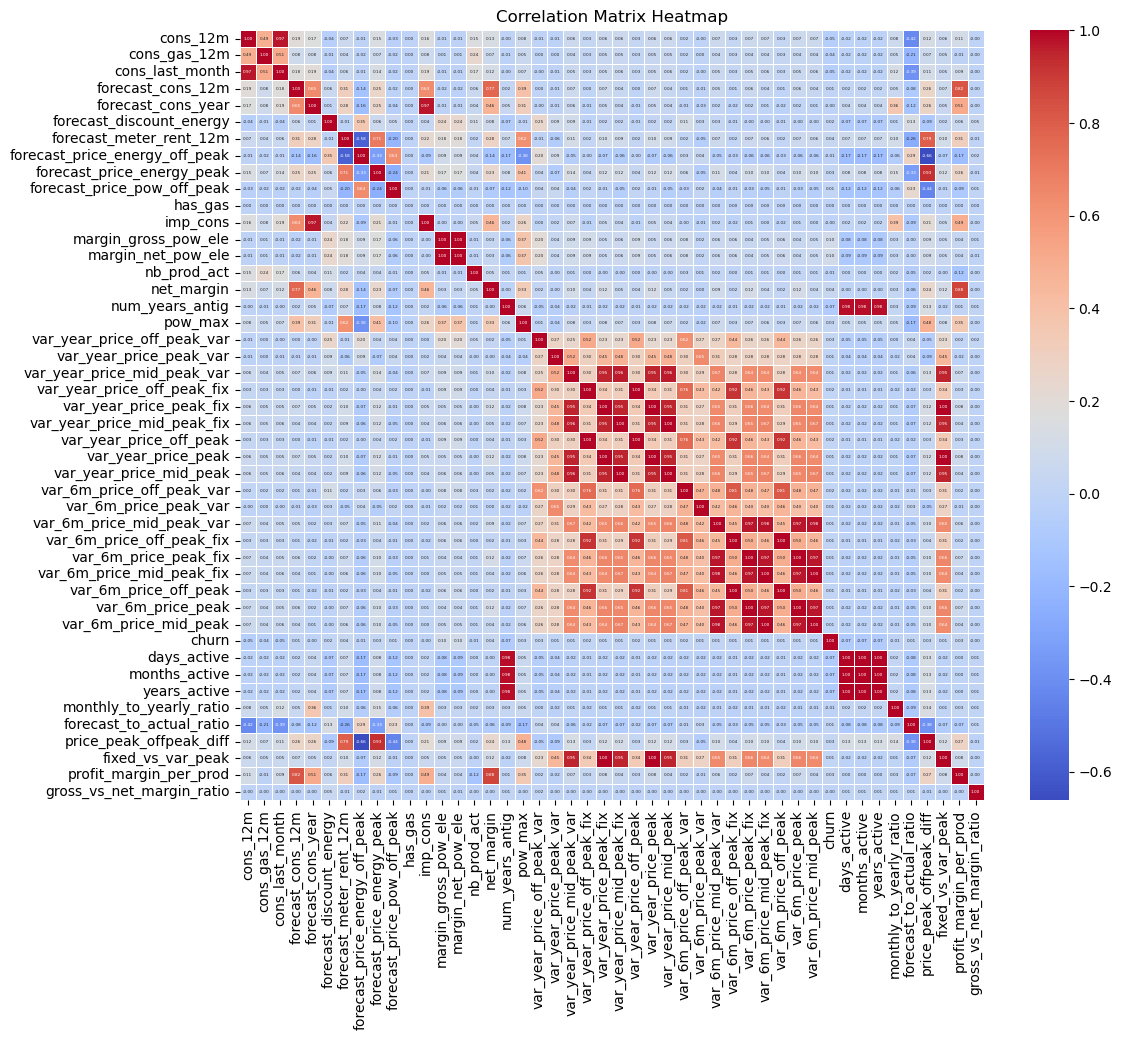

In [91]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'clean_dataset' is your DataFrame

# Select only numeric columns
numeric_columns = clean_dataset.select_dtypes(include=['number'])

correlation_matrix = correlation_matrix.fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,  
    annot_kws={'size': 3})  # Adjust font size here
plt.title('Correlation Matrix Heatmap')
plt.show()

